In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath("controlnet"))

In [2]:
from PIL import Image
import cm
import glob
import numpy as np
import matplotlib.pyplot as plt

/shared/spack/opt/spack/linux-amzn2-skylake_avx512/gcc-14.1.0/miniconda3-24.3.0-zxx5jostrj4myhf7bi3oap3ylkmegd3a/envs/neuro140/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-05-03 14:00:16.286341: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-03 14:00:16.286375: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-03 14:00:16.314670: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025

logging improved.


/shared/home/zas954/.local/lib/python3.11/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [3]:
def resize(image, size=(448, 448), pad=(255, 255, 255)):
    image.thumbnail((size[0], size[1]), Image.Resampling.LANCZOS)

    resized = Image.new("RGB", size, pad)

    x_offset = (size[0] - image.size[0]) // 2
    y_offset = (size[1] - image.size[1]) // 2

    resized.paste(image, (x_offset, y_offset))

    return resized

In [4]:
image_files = sorted(glob.glob("data/*_base.png") + glob.glob("data/*_test.png"))

images = []
for image_file in image_files:
    image = Image.open(image_file).convert("RGB")
    image = resize(image, size=(512, 512))
    images.append(image)

In [5]:
def interpolate(idx1, idx2, image1, image2, prompt, n_prompt, qc_prompt, qc_n_prompt, CM):
    out_dir = f"controlnet_data/{idx1}_{idx2}"
    cond_path = f"controlnet_data/conds/{idx1}_{idx2}.pt"

    CM.interpolate_qc(
        image1, 
        image2, 
        qc_prompts=(qc_prompt, qc_n_prompt),
        cond_path=cond_path, 
        prompt=prompt, 
        n_prompt=n_prompt, 
        optimize_cond=100, 
        ddim_steps=200, 
        num_frames=3, 
        guide_scale=10, 
        schedule_type="linear", 
        out_dir=out_dir
    )

In [6]:
CM = cm.ContextManager()

No module 'xformers'. Proceeding without it.
ControlLDM: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Loaded model config from [./controlnet/models/cldm_v15.yaml]


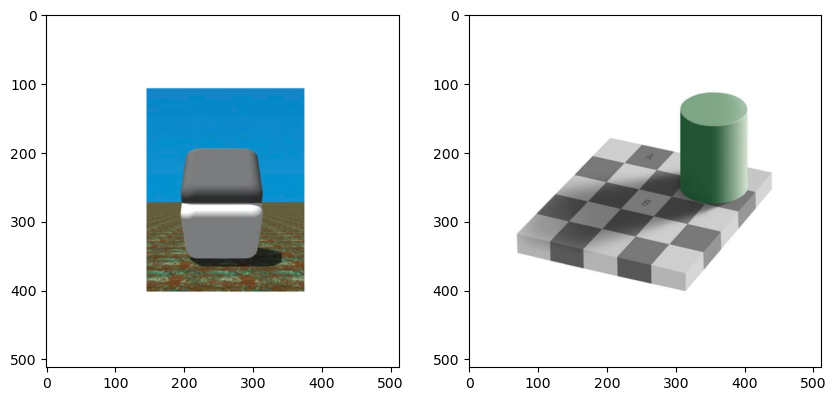

In [11]:
idx1 = 4
idx2 = 16

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(images[idx1])
ax[1].imshow(images[idx2])

In [13]:
prompt = "shadow, 3d render, high quality, monochromatic, illusion"
n_prompt = "2d, low quality, ugly"

qc_prompt = "elegent, 3d render, high quality"
qc_n_prompt = "low quality, 2d, ugly, blurry, complicated"

interpolate(idx1, idx2, images[idx1], images[idx2], prompt, n_prompt, qc_prompt, qc_n_prompt, CM)

Loaded state_dict from [./controlnet/models/control_sd15_canny.pth]


/shared/home/zas954/nb240/controlnet/ldm/modules/diffusionmodules/util.py:136: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  torch.cuda.amp.autocast(**ctx.gpu_autocast_kwargs):


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 59 timesteps


DDIM Sampler: 100%|██████████| 59/59 [00:19<00:00,  2.98it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 59 timesteps


DDIM Sampler: 100%|██████████| 59/59 [00:19<00:00,  2.96it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 59 timesteps


DDIM Sampler: 100%|██████████| 59/59 [00:20<00:00,  2.95it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 59 timesteps


DDIM Sampler: 100%|██████████| 59/59 [00:20<00:00,  2.94it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 59 timesteps


DDIM Sampler: 100%|██████████| 59/59 [00:20<00:00,  2.94it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 59 timesteps


DDIM Sampler: 100%|██████████| 59/59 [00:20<00:00,  2.93it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 59 timesteps


DDIM Sampler: 100%|██████████| 59/59 [00:20<00:00,  2.94it/s]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 59 timesteps


DDIM Sampler: 100%|██████████| 59/59 [00:20<00:00,  2.94it/s]
